# SGD Regresión logística multinomial Tensorflow

## Importar las librerías

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import time
from SGD_fun import *
import matplotlib.pyplot as plt
%matplotlib inline

## Leer el dataset

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

## Crear callback para almacenar el tiempo

In [4]:
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []
    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()
    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

## Definir el modelo y entrenarlo

In [5]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

n_epochs = 50
time_callback = TimeHistory()
history = model.fit(x_train_flattened, y_train, batch_size=100, epochs=n_epochs,callbacks=[time_callback])
times = time_callback.times

Epoch 1/50
600/600 [==============================] - 7s 1ms/step - loss: 0.6374 - accuracy: 0.8408
Epoch 2/50
600/600 [==============================] - 1s 1ms/step - loss: 0.3476 - accuracy: 0.9050
Epoch 3/50
600/600 [==============================] - 1s 1ms/step - loss: 0.3104 - accuracy: 0.9144
Epoch 4/50
600/600 [==============================] - 1s 1ms/step - loss: 0.2927 - accuracy: 0.9185
Epoch 5/50
600/600 [==============================] - 1s 1ms/step - loss: 0.2826 - accuracy: 0.9214
Epoch 6/50
600/600 [==============================] - 1s 2ms/step - loss: 0.2752 - accuracy: 0.9226
Epoch 7/50
600/600 [==============================] - 1s 1ms/step - loss: 0.2700 - accuracy: 0.9246
Epoch 8/50
600/600 [==============================] - 1s 1ms/step - loss: 0.2655 - accuracy: 0.9262
Epoch 9/50
600/600 [==============================] - 1s 1ms/step - loss: 0.2623 - accuracy: 0.9270
Epoch 10/50
600/600 [==============================] - 1s 1ms/step - loss: 0.2592 - accuracy: 0.9279

## Evaluar

313/313 [==============================] - 0s 738us/step
[1.7164322e-04 1.5833092e-10 1.0424764e-03 9.8910731e-01 1.9957067e-03
 2.7575845e-01 4.4339585e-10 9.9996138e-01 1.4143826e-01 7.9692078e-01]
7


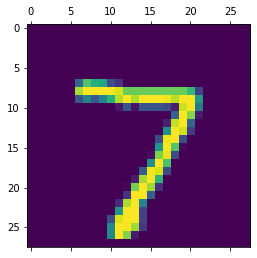

In [6]:
plt.matshow(x_test[0])

y_predicted = model.predict(x_test_flattened)
print(y_predicted[0])
print(np.argmax(y_predicted[0]))

## Gráficos

## Función de Costo

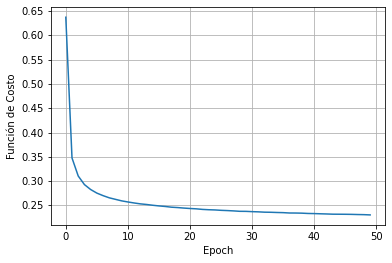

In [7]:
plt.plot(history.history['loss'])
plt.grid('on')
plt.xlabel('Epoch')
plt.ylabel('Función de Costo')
plt.show()

## Número de aciertos

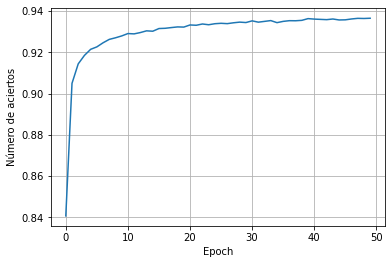

In [8]:
plt.plot(history.history['accuracy'])
plt.grid('on')
plt.xlabel('Epoch')
plt.ylabel('Número de aciertos')
plt.show()

## Función de costo - Cuenta de aciertos

## Tiempo - Función de Costo

In [9]:
times_numpy = np.array(times)
timet = np.cumsum(times_numpy)

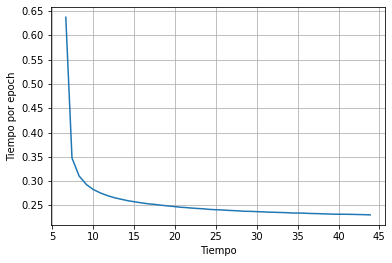

In [10]:
plt.plot(timet, history.history['loss'])
plt.grid('on')
plt.xlabel('Tiempo')
plt.ylabel('Tiempo por epoch')
plt.show()

## Tiempo - Cuenta de aciertos

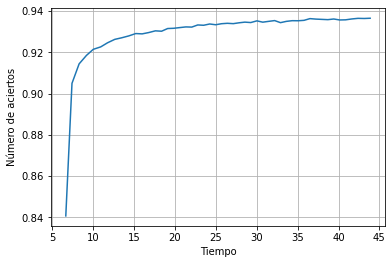

In [11]:
plt.plot(timet, history.history['accuracy'])
plt.grid('on')
plt.xlabel('Tiempo')
plt.ylabel('Número de aciertos')
plt.show()